### <img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales - 2019-2 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, preprocesamientos
* Redes Densas Feed Forward
* Regularización y Dropout
* Vanishing Gradient y Skip Connections
* Learn Rate Decay
* Optimizadores
* Redes Convolucionales
* Image Data Agumentation


**Formalidades**  
* Equipos de trabajo de 2 personas (*Ambos estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico del ayudante (<alvaro.valderrama.13@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>).   Especificar el siguiente asunto: [INF-395/477-2019 Tarea 1]. Invitar como colaborador al usuario de github "avalderr" para poder acceder al repositorio en caso de ser privado.
* Fecha de entrega y presentaciones: 22 de Noviembre. Hora límite de entrega: 23:59. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

La tarea se divide en tres partes:

* 1 - Redes Feed Forward para Airbnb
* 2 - Reconocimiento de Imagenes en CIFAR10    
* 3 - Reconocimiento de frutas y verduras

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo, solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con *comentarios* en celdas _Markdown_, con los comentarios de la pregunta y con cualquier analisis, fórmula (en $ \LaTeX $) o explicación que les parezca relevante para justificar sus procedimientos. *No respondan las preguntas en comentarios en el código*.
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará tanto la elección en si. En cambio la argumentación detrás de la elección será lo más ponderado.
Si algun modelo se demora demasiado en correr en su maquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, incluso con la opción de aceleración con GPU (particularmente útil para los modelos más grandes), esto puede ser relevante para las maquinas más lentas al momento de realizar exploraciones con _K-folds_ o las redes más grandes. Existe también la posibilidad de utilizar _Google Cloud Plataform_, donde tienen 300 dolares de prueba por un año y pueden comprar tiempo de procesamiento en maquinas aceleradas con GPU; maquinas ya configuradas para _deep leraning_ pueden encontrarse en el _Marketplace_.

_________________________

# 3 - Reconocimiento de frutas y verduras

Si bien CIFAR10 es una buenisima herramienta para introducirse a las redes neuronales convolucionales, sin embargo varias características de CIFAR10 lo hacen estar un poco alejado de la realidad del reconocimiento de imagenes hoy en día. Por ejemplo, como pudieron notar en la pregunta anterior, la resolución de $32\times 32$ es a penas suficiente para reconocer el objeto. Además 10 clases es relativamente poco comparado con los modelos del estado del arte, que obtienen resultado decentes en problemas con miles de categorías. Otra cosa que podrían haber notado, es que las redes entrenadas no tenían mucho problema en diferenciar clases "más" distintas que otras (por ejemplo, que cree que hubiera pasado si hubieramos truncado el _dataset_ para solo contener la clase caballo y avión, ¿cree que los desempeños serían los mismos?), mientras que en categorías más "cercanas" (como perro, gato y caballo) los desempeños eran relativamente peores. Es por esto que muchos _datasets_ utilizados en el estado del arte incluyen no solo variedad entre sus categorías, si no tambien categorías similares, que podrían agruparse en categorías de mayor gerarquía incluso. 

En esta pregunta, intentaremos de realizar un analisis sobre un _dataset_ un poco más realista, donde encontrará algunos de los problemas asociados a trabajar con gran número de imagenes. Originalmente se consideró trabajar con uno de los _dataset_ usuales en el estado del arte, el Caltech256, sin embargo por motivos de tiempo se prefirió este _dataset_ donde las imagenes vienen todas en el mismo formato ($100\times 100$) y no tendrémos que realizar preprocesamiento más acabados como aquellos que necesitaríamos con Caltech. El _dataset_ en cuestión corresponde a un problema de reconocimiento de frutas y verduras, disponible en el siguiente link de _kaggle_ https://www.kaggle.com/moltean/fruits o en el siguiente repositorio https://github.com/Horea94/Fruit-Images-Dataset. Este _dataset_ contiene miles de imagenes de 120 frutas y verduras diferentes clasificadas por variedades. Intentaremos resolver este problema utilizando las 120 clases, notando que si bien el hecho de acortarse a un campo semantico en particular (i.e. frutas y verduras) permitirá que nuestro algoritmo se especialice más en la detección de las diferencias entre sus categorías, también implica que las diferencias seran más pequeñas que lo que serían en un _dataset_ más variado. Luego intentaremos resolver el problema utilizando categorías más amplias, donde no se distinga entre variedades de la misma fruta, y veremos en qué tarea tenemos mejor desempeño. 

### 3.a Carga y preprocesamiento de Imagenes

Lea la descripción del dataset para familiarizarse con la estructura donde se guardan las imagenes y como deberemos cargarlas recordando la categoría de cada una. 

Cargue todas las imagenes junto con sus categorías a un _DataFrame_. Note que esto puede tomar bastante tiempo por la cantidad de imagenes. El código propuesto utiliza la librería Pillow, sin embargo pueden usar el método que prefieran, incluso pueden no basarse para nada en el código propuesto. Aprovecharemos la separación de _Training_ y _Test_ de _dataset_, y utilizaremos el primero para entrenamiento y el segundo para validación. 

Esta vez optaremos por dejar los valores entre $[-127, 128]$ para poder utilizar un encoding `uint8` en `numpy` lo cual reducirá drásticamente el uso de memoria al momento de cargar los datos. Separe luego los arrays de inputs y outputs de nuestro modelo, sin olvidar transformar las categorías del _target_ a _one hot vector_ como aprendió en el resto de la tarea. 

Si lo desea, podría ser recomendable guardar los datos preprocesados utiizando la función `np.save` para ahorrarse el tiempo de computo que requiere esta operación en caso de que tuviera que correr varias veces esta pregunta. 

Visualice alguna de las imagenes en `image_list`. Verifique que los datos se hayan cargado bien viendo los `shape` de los arrays o con algun otro indicador que le dé algo de confianza. Utilice `matplotlib.pyplot.imshow` con algunos ejemplos de los _arrays_ para verificar que no se haya perdido información y que la carga de datos se realizó correctamente. 

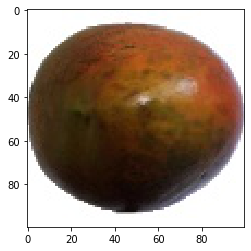

In [0]:
import PIL.Image
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

base_path = os.getcwd()
data_path_train = os.path.join(base_path, "fruits-360_dataset", "fruits-360", "Training") 
data_path_test = os.path.join(base_path, "fruits-360_dataset", "fruits-360", "Test") 
categories_train = os.listdir(data_path_train)
categories_test = os.listdir(data_path_test)

image_list_train = []
image_list_test = []

df_train = pd.DataFrame(columns=['x','y'])
for cat in categories_train:
    image_files = os.listdir(os.path.join(data_path_train, cat))
    for image_path in image_files:
        if '.jpg' in image_path: # to avoid unpleseant surprises
            full_path = os.path.join(data_path_train, cat, image_path)
            im = PIL.Image.open(full_path)
            arr = np.asarray(im)
            df_train = df_train.append({'x':arr, 'y':cat}, ignore_index=True)
    image_list_train.append(im)

df_test = pd.DataFrame(columns=['x','y'])
for cat in categories_test:
    image_files = os.listdir(os.path.join(data_path_test, cat))
    for image_path in image_files:
        if '.jpg' in image_path: # to avoid unpleseant surprises
            full_path = os.path.join(data_path_test, cat, image_path)
            im = PIL.Image.open(full_path)
            arr = np.asarray(im)
            df_test = df_test.append({'x':arr, 'y':cat}, ignore_index=True)
    image_list_test.append(im)

plt.imshow(image_list_train[0])
plt.imshow(image_list_test[0])

In [0]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_train = le.fit_transform(df_train['y'])
Y_val = le.transform(df_test['y'])

df_train['x'] = df_train['x'] - 127
df_test['x'] = df_test['x'] - 127

X_train = df_train['x'].values
y_train = to_categorical(Y_train)
X_val = df_test['x'].values
y_val = to_categorical(Y_val)

X_train = np.concatenate(X_train).reshape(60498, 100, 100, 3)
X_val = np.concatenate(X_val).reshape(20622, 100, 100, 3)

print(X_train.shape)
print(X_train[0].shape)
print(X_val.shape)
print(X_val[0].shape)
print(y_train.shape)
print(y_train[0].shape)
print(y_val.shape)
print(y_val[0].shape)

print(X_train)
print(X_val)

n_classes = y_train.shape[1]

np.save('X_train.npy', X_train)
np.save('X_val.npy', X_val)
np.save('y_train.npy', y_train)
np.save('y_val.npy', y_val)

df_train = []
df_test = []
image_list_train = []
image_list_test = []

/home/marimo/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/marimo/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/marimo/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/marimo/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dty

(60498, 100, 100, 3)
(100, 100, 3)
(20622, 100, 100, 3)
(100, 100, 3)
(60498, 120)
(120,)
(20622, 120)
(120,)
[[[[128 128 128]
   [128 128 128]
   [128 128 128]
   ...
   [128 128 128]
   [128 128 128]
   [128 128 128]]

  [[128 128 128]
   [128 128 128]
   [128 128 128]
   ...
   [128 128 128]
   [128 128 128]
   [128 128 128]]

  [[128 128 128]
   [128 128 128]
   [128 128 128]
   ...
   [128 128 128]
   [128 128 128]
   [128 128 128]]

  ...

  [[128 128 128]
   [128 128 128]
   [128 128 128]
   ...
   [128 128 128]
   [128 128 128]
   [128 128 128]]

  [[128 128 128]
   [128 128 128]
   [128 128 128]
   ...
   [128 128 128]
   [128 128 128]
   [128 128 128]]

  [[128 128 128]
   [128 128 128]
   [128 128 128]
   ...
   [128 128 128]
   [128 128 128]
   [128 128 128]]]


 [[[128 128 128]
   [128 128 128]
   [128 128 128]
   ...
   [128 128 128]
   [128 128 128]
   [128 128 128]]

  [[128 128 128]
   [128 128 128]
   [128 128 128]
   ...
   [128 128 128]
   [128 128 128]
   [128 128 

#### La carga de datos fue exitosa, y para el preprocesamiento y separación se dejan listos los 2 targets (fruta y fruta con categoría). Además de esto, un reshape es necesario para que keras pueda leer correctamente el input. Podemos ver al imprimir los shapes que está todo en orden. Todo este preprocesamiento se hizo de forma local para luego guardar los archivos de entrenamiento y correrlos en Colab.

### 3.b Primera red
Entrene una primera red que alcance un _accuracy_ sobre validación de a lo menos un $80\%$

Puede utilizar todos los conceptos aprendidos en la tarea anterior, aunque la recomendación es dejar _Data Augmentation_ para una última iteración, una vez ya hayamos encontrado una estructura que se comporte relativamente bien. Una arquitectura relativamente buena podria ser una basada en los bloques definidos en el item 2.e, con al rededor de 5 bloques. Si desea aumentar la profundidad de su red sientase libre utilizar otras estructuras con menos _MaxPool_. Note que la nueva base de datos permite crear redes más profundas de todas  formas, pues no se alcanza el limite impuesto por la dimensión de las imagenes tan pronto. 

Reporte el resultado de un par de redes, comentando por qué realizo ajustes a ellas. Note que estos entrenamiento implican calculos con grandes cantidades de datos y probablemente sea recomendarlo correrlos en _hardware_ acelerado por GPU. 

In [ ]:
#from google.colab import files
#uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')

#### Se monta la unidad de drive con el notebook, es una forma muy buena de usar archivos pesados en Colab, considerando que la velocidad de subida a Drive es mucho mayor que la velocidad de subida a Colab, y no tiene mayor demora.

In [0]:
import numpy as np

X_train = np.load('drive/My Drive/Colab Notebooks/X_train.npy')
X_val = np.load('drive/My Drive/Colab Notebooks/X_val.npy')
y_train = np.load('drive/My Drive/Colab Notebooks/y_train.npy')
y_val = np.load('drive/My Drive/Colab Notebooks/y_val.npy')
y_train2 = np.load('drive/My Drive/Colab Notebooks/y_train2.npy')
y_val2 = np.load('drive/My Drive/Colab Notebooks/y_val2.npy')

#### Se cargan los archivos en el notebook de Colab, sin mayor problema.

In [17]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

#Callback
stopper = EarlyStopping('val_loss', 0.01, patience=5)

#Arquitectura
visible = Input(shape=(100, 100, 3), name='input')
conv1 = Conv2D(128, kernel_size=3, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=3, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(32, kernel_size=3, activation='relu')(pool2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
flat = Flatten()(pool3)
hidden1 = Dense(256, activation='relu')(flat)
hidden2 = Dense(128, activation='relu')(hidden1)
hidden3 = Dense(64, activation='relu')(hidden2)
output = Dense(120, activation='softmax')(hidden3)
model = Model(inputs=visible, outputs=output)

adam = Adam(lr=0.001)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=40,
                    callbacks=[stopper],
                    verbose=1,
                    validation_data=(X_val, y_val))


Train on 60498 samples, validate on 20622 samples
Epoch 1/40
60498/60498 [==============================] - 70s 1ms/sample - loss: 1.2473 - categorical_accuracy: 0.6976 - val_loss: 1.2609 - val_categorical_accuracy: 0.7158
Epoch 2/40
60498/60498 [==============================] - 71s 1ms/sample - loss: 0.2355 - categorical_accuracy: 0.9288 - val_loss: 1.4774 - val_categorical_accuracy: 0.7376
Epoch 3/40
60498/60498 [==============================] - 70s 1ms/sample - loss: 0.1668 - categorical_accuracy: 0.9506 - val_loss: 1.0747 - val_categorical_accuracy: 0.8030
Epoch 4/40
60498/60498 [==============================] - 70s 1ms/sample - loss: 0.1205 - categorical_accuracy: 0.9658 - val_loss: 1.1359 - val_categorical_accuracy: 0.8061
Epoch 5/40
60498/60498 [==============================] - 68s 1ms/sample - loss: 0.1148 - categorical_accuracy: 0.9669 - val_loss: 1.1135 - val_categorical_accuracy: 0.7930
Epoch 6/40
60498/60498 [==============================] - 68s 1ms/sample - loss: 0.09

#### Se entrena esta arquitectura de forma simple, la cual llega a 80% en validación en la época 3.

In [18]:
#Arquitectura
visible = Input(shape=(100, 100, 3), name='input')
conv1 = Conv2D(128, kernel_size=3, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=3, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(32, kernel_size=3, activation='relu')(pool2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
flat = Flatten()(pool3)
hidden1 = Dense(256, activation='relu')(flat)
drop1 = Dropout(0.2)(hidden1)
hidden2 = Dense(128, activation='relu')(drop1)
drop2 = Dropout(0.2)(hidden2)
hidden3 = Dense(64, activation='relu')(drop2)
output = Dense(120, activation='softmax')(hidden3)
model = Model(inputs=visible, outputs=output)

adam = Adam(lr=0.001)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=40,
                    callbacks=[stopper],
                    verbose=1,
                    validation_data=(X_val, y_val))


Train on 60498 samples, validate on 20622 samples
Epoch 1/40
60498/60498 [==============================] - 76s 1ms/sample - loss: 2.8935 - categorical_accuracy: 0.3160 - val_loss: 1.4282 - val_categorical_accuracy: 0.6651
Epoch 2/40
60498/60498 [==============================] - 71s 1ms/sample - loss: 0.4422 - categorical_accuracy: 0.8649 - val_loss: 0.5981 - val_categorical_accuracy: 0.8579
Epoch 3/40
60498/60498 [==============================] - 68s 1ms/sample - loss: 0.1923 - categorical_accuracy: 0.9428 - val_loss: 0.4452 - val_categorical_accuracy: 0.8984
Epoch 4/40
60498/60498 [==============================] - 67s 1ms/sample - loss: 0.1382 - categorical_accuracy: 0.9613 - val_loss: 0.5819 - val_categorical_accuracy: 0.8832
Epoch 5/40
60498/60498 [==============================] - 74s 1ms/sample - loss: 0.1170 - categorical_accuracy: 0.9683 - val_loss: 0.5319 - val_categorical_accuracy: 0.8865
Epoch 6/40
60498/60498 [==============================] - 72s 1ms/sample - loss: 0.10

#### Se procede a agregar Dropout a la arquitectura, logrando resultados aún mejores en validación casi llegando al 90% de accuracy.

In [19]:
#Callback
stopper = EarlyStopping('val_loss', 0.005, patience=5)

#Arquitectura
visible = Input(shape=(100, 100, 3), name='input')
conv1 = Conv2D(128, kernel_size=3, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=3, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(32, kernel_size=3, activation='relu')(pool2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
flat = Flatten()(pool3)
hidden1 = Dense(256, activation='relu')(flat)
drop1 = Dropout(0.4)(hidden1)
hidden2 = Dense(128, activation='relu')(drop1)
drop2 = Dropout(0.3)(hidden2)
hidden3 = Dense(64, activation='relu')(drop2)
output = Dense(120, activation='softmax')(hidden3)
model = Model(inputs=visible, outputs=output)

adam = Adam(lr=0.0001)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=40,
                    callbacks=[stopper],
                    verbose=1,
                    validation_data=(X_val, y_val))


Train on 60498 samples, validate on 20622 samples
Epoch 1/40
60498/60498 [==============================] - 68s 1ms/sample - loss: 3.2778 - categorical_accuracy: 0.2875 - val_loss: 1.0060 - val_categorical_accuracy: 0.7681
Epoch 2/40
60498/60498 [==============================] - 72s 1ms/sample - loss: 0.8544 - categorical_accuracy: 0.7588 - val_loss: 0.4448 - val_categorical_accuracy: 0.8908
Epoch 3/40
60498/60498 [==============================] - 74s 1ms/sample - loss: 0.3967 - categorical_accuracy: 0.8811 - val_loss: 0.2847 - val_categorical_accuracy: 0.9312
Epoch 4/40
60498/60498 [==============================] - 69s 1ms/sample - loss: 0.2414 - categorical_accuracy: 0.9258 - val_loss: 0.2683 - val_categorical_accuracy: 0.9381
Epoch 5/40
60498/60498 [==============================] - 70s 1ms/sample - loss: 0.1704 - categorical_accuracy: 0.9478 - val_loss: 0.2025 - val_categorical_accuracy: 0.9457
Epoch 6/40
60498/60498 [==============================] - 72s 1ms/sample - loss: 0.13

#### Como última modificación se aumenta el parámetro del Dropout, logrando resultados incluso mejores en validación llegando al 97% de accuracy en la época 15. Esta arquitectura fue reciclada de un problema previo de clasificación de números de fotografías de boletas, y decidí modificarla agregandole Dropout como en el problema 1, descubriendo que funciona mejor aún. Además, al aumentarle el parámetro del Dropout mejora más aún el score en validación. En definitiva, todas estas mejoras de solo agregar Dropout se traducen en un incremento de cerca de 17% de acurracy en validación, lo que indica un mejor aprendizaje del modelo y menor sobreajuste.

### 3.c Batch Normalization
Una manera propuesta de mejorar los desempeños de las redes en general, que funciona bastante bien en tareas de reconocimiento de imagenes es _Batch Normalization_. Segun su conocimiento teórico y investigación, ¿Qué realiza _Batch Normalization_ en términos matemáticos? En terminos de aprendizaje, ¿qué evita la utilización de _Batch Normalization_?

Entren nuevamente su red preferida de la pregunta anterior, agregando capas de _Batch Normalization_ luego de cada capa de _MaxPool_. Comente sus resultados. 

¿Mejoran los desempeños de la red agregando _Batch Normalization_? ¿Existe diferencias entre una capa de _batch normalization_ justo antes o justo despues de una capa de _MaxPool_ en términos numéricos? ¿Opina lo mismo en términos de aprendizaje? Discuta. 

In [20]:
from tensorflow.keras.layers import BatchNormalization
#Callback
stopper = EarlyStopping('val_loss', 0.005, patience=5)

#Arquitectura
visible = Input(shape=(100, 100, 3), name='input')
conv1 = Conv2D(128, kernel_size=3, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
bn1 = BatchNormalization()(pool1)
conv2 = Conv2D(64, kernel_size=3, activation='relu')(bn1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
bn2 = BatchNormalization()(pool2)
conv3 = Conv2D(32, kernel_size=3, activation='relu')(bn2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
bn3 = BatchNormalization()(pool3)
flat = Flatten()(bn3)
hidden1 = Dense(256, activation='relu')(flat)
drop1 = Dropout(0.4)(hidden1)
hidden2 = Dense(128, activation='relu')(drop1)
drop2 = Dropout(0.3)(hidden2)
hidden3 = Dense(64, activation='relu')(drop2)
output = Dense(120, activation='softmax')(hidden3)
model = Model(inputs=visible, outputs=output)

adam = Adam(lr=0.0001)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=40,
                    callbacks=[stopper],
                    verbose=1,
                    validation_data=(X_val, y_val))


Train on 60498 samples, validate on 20622 samples
Epoch 1/40
60498/60498 [==============================] - 78s 1ms/sample - loss: 1.9859 - categorical_accuracy: 0.5221 - val_loss: 0.3914 - val_categorical_accuracy: 0.8981
Epoch 2/40
60498/60498 [==============================] - 79s 1ms/sample - loss: 0.3685 - categorical_accuracy: 0.8918 - val_loss: 0.1655 - val_categorical_accuracy: 0.9525
Epoch 3/40
60498/60498 [==============================] - 78s 1ms/sample - loss: 0.1618 - categorical_accuracy: 0.9525 - val_loss: 0.1248 - val_categorical_accuracy: 0.9633
Epoch 4/40
60498/60498 [==============================] - 80s 1ms/sample - loss: 0.0913 - categorical_accuracy: 0.9726 - val_loss: 0.1082 - val_categorical_accuracy: 0.9695
Epoch 5/40
60498/60498 [==============================] - 83s 1ms/sample - loss: 0.0613 - categorical_accuracy: 0.9811 - val_loss: 0.0979 - val_categorical_accuracy: 0.9712
Epoch 6/40
60498/60498 [==============================] - 75s 1ms/sample - loss: 0.04

#### Batch Normalization es una técnica que busca normalizar las activaciones de una capa respecto de los datos del batch, con el objetivo de fijar una misma distribución para todas las capas. Utilizar Batch Normalization evita el sobreajuste del modelo, ya que la formula de normalización actúa como regularizador. Además, reduce el covariance shift en las capas ocultas y permite usar learning rates más altos (debido a que escala las activaciones), lo que tiene como consecuencia un entrenamiento más rápido.
#### Efectivamente, al red mejora su desempeño en validación al agregar Batch normalization, llegando al 98%. Agregar Batch normalization antes o despues de un max pool no afecta si tomamos en cuenta que la capa de maxPool extrae los valores mayores, valores que después de ser escalados mantienen el orden, por lo que el resultado es el mismo. Lo que si cambiaría es la cantidad de datos a escalar, ya que al hacerlo antes del Maxpool se realiza un mayor número de normalizaciones.

### 3.d Skip Connections
Otra manera de mejorar los resultados de las redes, sobretodo de las redes profundas donde se observa el problema de _vanishing gradient_ son las relativamente nuevas _skip connections_ o redes residuales. En vez de preocuparse de como manejar los pesos de la red para permitir que el gradiente no explote o no desaparezca, se permite al gradiente "pasar" sin ser modificado, agregando conecciones con pesos fijos entre capas de distintas profundidades, en la practica permitiendo a la señar "saltarse" las capas intermedias. Esta idea ha permitido desarrollos como los de ResNet, llegando a profundidades de cientos de capas y aún logrando aprendizaje. 

Para implementar estas ideas debemos utilizar la API funcional de Keras al momento de construir los modelos. Algo que debemos notar es que la mayoría de los objetos de keras pueden ser llamados como funciones, y al momento de hacerlo con objetos `layers` es equivalente a conectarlos, por lo cual si hacemos `x(y)` retornamos un objeto con la capa `y` conectada a la capa `x`. 

Basandose en el código mostrado abajo, implemente una ResNet de su gusto, puede agregar _Skip conections_ a una red utilizada anteriormente o crear una nueva. Con estas redes debería lograr facilmente un _accuracy_ de al menos $90\%$

Comente sus resultados. 

In [26]:
from tensorflow.keras.layers import concatenate

#Arquitectura
visible = Input(shape=(100, 100, 3), name='input')
conv1 = Conv2D(128, kernel_size=3, padding='same', activation='relu')(visible)
conv1 = Conv2D(128, kernel_size=3, padding='same', activation='relu')(conv1)

res1 = concatenate([conv1, visible])

pool1 = MaxPooling2D(pool_size=(2, 2))(res1)
bn1 = BatchNormalization()(pool1)
conv2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(bn1)
conv2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(conv2)

res2 = concatenate([conv2, bn1])

pool2 = MaxPooling2D(pool_size=(2, 2))(res2)
bn2 = BatchNormalization()(pool2)
conv3 = Conv2D(32, kernel_size=3, padding='same', activation='relu')(bn2)
conv3 = Conv2D(32, kernel_size=3, padding='same', activation='relu')(conv3)

res3 = concatenate([conv3, bn2])

pool3 = MaxPooling2D(pool_size=(2, 2))(res3)
bn3 = BatchNormalization()(pool3)
flat = Flatten()(bn3)
hidden1 = Dense(256, activation='relu')(flat)
drop1 = Dropout(0.4)(hidden1)
hidden2 = Dense(128, activation='relu')(drop1)
drop2 = Dropout(0.3)(hidden2)
hidden3 = Dense(64, activation='relu')(drop2)
output = Dense(120, activation='softmax')(hidden3)
model = Model(inputs=visible, outputs=output)

adam = Adam(lr=0.0001)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=40,
                    callbacks=[stopper],
                    verbose=1,
                    validation_data=(X_val, y_val))

Train on 60498 samples, validate on 20622 samples
Epoch 1/40
60498/60498 [==============================] - 208s 3ms/sample - loss: 1.3137 - categorical_accuracy: 0.6796 - val_loss: 0.2351 - val_categorical_accuracy: 0.9344
Epoch 2/40
60498/60498 [==============================] - 205s 3ms/sample - loss: 0.1824 - categorical_accuracy: 0.9457 - val_loss: 0.1289 - val_categorical_accuracy: 0.9659
Epoch 3/40
60498/60498 [==============================] - 204s 3ms/sample - loss: 0.1036 - categorical_accuracy: 0.9680 - val_loss: 0.2005 - val_categorical_accuracy: 0.9640
Epoch 4/40
60498/60498 [==============================] - 205s 3ms/sample - loss: 0.0705 - categorical_accuracy: 0.9781 - val_loss: 0.0995 - val_categorical_accuracy: 0.9763
Epoch 5/40
60498/60498 [==============================] - 204s 3ms/sample - loss: 0.0547 - categorical_accuracy: 0.9839 - val_loss: 0.1229 - val_categorical_accuracy: 0.9748
Epoch 6/40
60498/60498 [==============================] - 204s 3ms/sample - loss

#### Se agregó 3 veces skip connections al modelo anterior, después de cada convolución. Era díficil pensar en que un modelo que ya tenía 98% de accuracy en validación podría mejorar, pero se ve un leve incremento en el accuracy de todas formas, al igual que la perdida de validación, por lo que podemos asumir que el modelo con skip connections es aún mejor.

### 3.e Red Final 

De todas las redes entrenadas anteriormente, elija la con mejor desempeño y entrenela utizando aumentación de datos como aprendió en las preguntas anteriores. ¿Mejora el desempeño de la red? 

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, concatenate, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.1,
    channel_shift_range=0.0,
    fill_mode='constant',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None)

datagen.fit(X_train)

stopper = EarlyStopping('val_loss', 0.005, patience=5)

visible = Input(shape=(100, 100, 3), name='input')
conv1 = Conv2D(128, kernel_size=3, padding='same', activation='relu')(visible)
conv1 = Conv2D(128, kernel_size=3, padding='same', activation='relu')(conv1)

res1 = concatenate([conv1, visible])

pool1 = MaxPooling2D(pool_size=(2, 2))(res1)
bn1 = BatchNormalization()(pool1)
conv2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(bn1)
conv2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(conv2)

res2 = concatenate([conv2, bn1])

pool2 = MaxPooling2D(pool_size=(2, 2))(res2)
bn2 = BatchNormalization()(pool2)
conv3 = Conv2D(32, kernel_size=3, padding='same', activation='relu')(bn2)
conv3 = Conv2D(32, kernel_size=3, padding='same', activation='relu')(conv3)

res3 = concatenate([conv3, bn2])

pool3 = MaxPooling2D(pool_size=(2, 2))(res3)
bn3 = BatchNormalization()(pool3)
flat = Flatten()(bn3)
hidden1 = Dense(256, activation='relu')(flat)
drop1 = Dropout(0.4)(hidden1)
hidden2 = Dense(128, activation='relu')(drop1)
drop2 = Dropout(0.3)(hidden2)
hidden3 = Dense(64, activation='relu')(drop2)
output = Dense(120, activation='softmax')(hidden3)
model = Model(inputs=visible, outputs=output)

adam = Adam(lr=0.0001)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=50,
                    verbose=2,
                    callbacks=[stopper],
                    validation_data=(X_val,y_val),
                    validation_freq=1,
                    shuffle=True)

Epoch 1/50
Epoch 1/50
20622/1891 - 13s - loss: 0.6508 - categorical_accuracy: 0.8054
1891/1891 - 136s - loss: 2.5098 - categorical_accuracy: 0.4070 - val_loss: 0.7763 - val_categorical_accuracy: 0.8054
Epoch 2/50
Epoch 1/50
20622/1891 - 13s - loss: 0.1667 - categorical_accuracy: 0.9366
1891/1891 - 127s - loss: 0.7352 - categorical_accuracy: 0.7869 - val_loss: 0.2393 - val_categorical_accuracy: 0.9366
Epoch 3/50
Epoch 1/50
20622/1891 - 12s - loss: 0.1544 - categorical_accuracy: 0.9558
1891/1891 - 126s - loss: 0.3753 - categorical_accuracy: 0.8872 - val_loss: 0.1871 - val_categorical_accuracy: 0.9558
Epoch 4/50
Epoch 1/50
20622/1891 - 13s - loss: 0.0936 - categorical_accuracy: 0.9727
1891/1891 - 127s - loss: 0.2418 - categorical_accuracy: 0.9249 - val_loss: 0.1271 - val_categorical_accuracy: 0.9727
Epoch 5/50
Epoch 1/50
20622/1891 - 13s - loss: 0.1825 - categorical_accuracy: 0.9391
1891/1891 - 126s - loss: 0.1827 - categorical_accuracy: 0.9430 - val_loss: 0.2683 - val_categorical_accurac

#### A estas altura ya cuesta diferenciar si las diferencias en los resultados son por mejoras en el modelo o producto del random. De cualquier forma, los resultados se ven similares al anterior. Creo que es curioso notar que, las imagenes del conjunto de prueba fueron tomadas con una cámara de video mientras eran rotadas, por lo que las imágenes ya poseen un cierto grado de aumentación en sí mismas, lo que puede haber minimizado el efecto de nuestra aumentación.

### 3.f Modelo para frutas
Repita la el item anterior, pero esta vez sobre el problema de clasificación de las frutas y verduras independiente de sus variedades. Para esto deberá cargar nuevamente los datos, esta vez transformando las categorías que originalmente eran un `string` a la primera palabra del string. Así al momento de hacer el paso a categorías y _one hot vector_, todas las imagenes con la misma fruta o verdura quedarán en la misma categoría. 

- ¿Cómo se desempeña el modelo esta vez? 
- ¿_A priori_ cuál habría considerado el problema más dificil para un modelo de aprendizaje de máquinas? Discuta. 

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, concatenate, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.1,
    channel_shift_range=0.0,
    fill_mode='constant',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None)

datagen.fit(X_train)

stopper = EarlyStopping('val_loss', 0.005, patience=5)

visible = Input(shape=(100, 100, 3), name='input')
conv1 = Conv2D(128, kernel_size=3, padding='same', activation='relu')(visible)
conv1 = Conv2D(128, kernel_size=3, padding='same', activation='relu')(conv1)

res1 = concatenate([conv1, visible])

pool1 = MaxPooling2D(pool_size=(2, 2))(res1)
bn1 = BatchNormalization()(pool1)
conv2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(bn1)
conv2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(conv2)

res2 = concatenate([conv2, bn1])

pool2 = MaxPooling2D(pool_size=(2, 2))(res2)
bn2 = BatchNormalization()(pool2)
conv3 = Conv2D(32, kernel_size=3, padding='same', activation='relu')(bn2)
conv3 = Conv2D(32, kernel_size=3, padding='same', activation='relu')(conv3)

res3 = concatenate([conv3, bn2])

pool3 = MaxPooling2D(pool_size=(2, 2))(res3)
bn3 = BatchNormalization()(pool3)
flat = Flatten()(bn3)
hidden1 = Dense(256, activation='relu')(flat)
drop1 = Dropout(0.4)(hidden1)
hidden2 = Dense(128, activation='relu')(drop1)
drop2 = Dropout(0.3)(hidden2)
hidden3 = Dense(64, activation='relu')(drop2)
output = Dense(63, activation='softmax')(hidden3)
model = Model(inputs=visible, outputs=output)

adam = Adam(lr=0.0001)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

history = model.fit_generator(datagen.flow(X_train, y_train2, batch_size=32),
                    epochs=50,
                    verbose=2,
                    callbacks=[stopper],
                    validation_data=(X_val,y_val2),
                    validation_freq=1,
                    shuffle=True)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Epoch 1/50
Epoch 1/50
20622/1891 - 12s - loss: 0.3835 - categorical_accuracy: 0.8569
1891/1891 - 137s - loss: 1.9122 - categorical_accuracy: 0.5082 - val_loss: 0.5331 - val_categorical_accuracy: 0.8569
Epoch 2/50
Epoch 1/50
20622/1891 - 12s - loss: 0.2824 - categorical_accuracy: 0.9186
1891/1891 - 130s - loss: 0.5597 - categorical_accuracy: 0.8357 - val_loss: 0.3391 - val_categorical_accuracy: 0.9186
Epoch 3/50
Epoch 1/50
20622/1891 - 12s - loss: 0.4281 - categorical_accuracy: 0.9590
1891/1891 - 131s - loss: 0.2860 - categorical_accuracy: 0.9154 - val_loss: 0.6247 - val_categorical_accuracy: 0.9590
Epoch 4/50
Epoch 1/50
20622/1891 - 12s - loss: 0.1700 - categorical_accuracy: 0.9736
1891/1891 - 130s - loss: 0.1977 - categorical_accuracy: 0.9400 - val_loss: 0.2912 - val_categorical_accuracy: 0.9736
Epoch 5/50
Epoch 1/50
20622/1891 - 12s - loss: 0.1098 - categorical_accuracy: 0.9700
1891/1891 - 129s - loss: 0

#### El rendimiento para este caso es mejor que para el caso anterior, aunque la mejora sea menor a 1% de accuracy en validación.
#### Para mí, la dificultad de un problema de clasificación suele darse por factores como clases mal balanceadas, alto número de clases, clases muy parecidas entre ellas y pocos datos, entre otros. A priori, habría considerado como problema más dificil el problema anterior, ya que tiene clases muy similares unas con otras (por ejemplo, variedades de manzanas). Es en estos casos donde el extractor de características debe ser muy bueno para poder diferenciar estas clases parecidas. Además, se reduce el número de clases a clasificar, lo que debería significar que el modelo pueda obtener probabilidades más certeras para cada clase. 